<a href="https://colab.research.google.com/github/kunwarsharik/SharikProjects/blob/master/QR_Bar_code_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!sudo apt-get install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.10+doc-10.1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [45]:
!pip install pyzbar

In [0]:
from pyzbar import pyzbar

In [47]:
!wget https://cdn.hswstatic.com/gif/barcode2-1.jpg

--2020-02-07 14:19:24--  https://cdn.hswstatic.com/gif/barcode2-1.jpg
Resolving cdn.hswstatic.com (cdn.hswstatic.com)... 99.86.33.23, 99.86.33.83, 99.86.33.78, ...
Connecting to cdn.hswstatic.com (cdn.hswstatic.com)|99.86.33.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31603 (31K) [image/jpeg]
Saving to: ‘barcode2-1.jpg.1’

barcode2-1.jpg.1    100%[===================>]  30.86K  --.-KB/s    in 0.003s  

2020-02-07 14:19:25 (10.2 MB/s) - ‘barcode2-1.jpg.1’ saved [31603/31603]



In [48]:
ls

barcode2-1.jpg  barcode2-1.jpg.1  ean13_barcode.png  qr.png  sample_data/


In [0]:
import  cv2, matplotlib.pyplot as plt

In [0]:
img=plt.imread('barcode2-1.jpg')

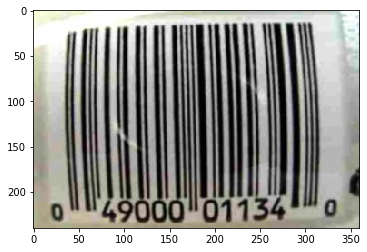

In [51]:
plt.imshow(img)

In [0]:
bar=pyzbar.decode(img)

In [53]:
bar[0].data.decode("utf-8")

'0049000011340'

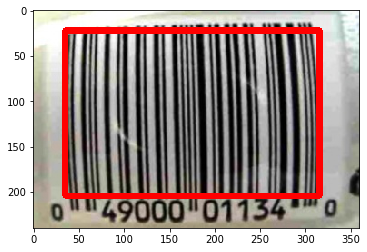

In [54]:
for b in bar:
    (x,y,w,h)=b.rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 5)
plt.imshow(img)

Generating barcode

In [55]:
!pip install python-barcode

In [0]:
import barcode as br

In [0]:
from barcode.writer import ImageWriter

In [58]:
br.PROVIDED_BARCODES

['code128',
 'code39',
 'ean',
 'ean13',
 'ean14',
 'ean8',
 'gs1',
 'gs1_128',
 'gtin',
 'isbn',
 'isbn10',
 'isbn13',
 'issn',
 'itf',
 'jan',
 'pzn',
 'upc',
 'upca']

file-  ean13_barcode.png


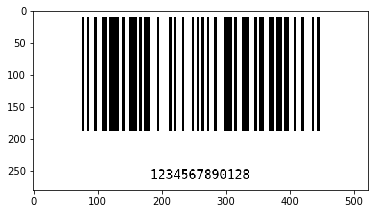

In [59]:
brtype=br.get_barcode('ean13')
generated=brtype('1234567890123',writer=ImageWriter())
fullname = generated.save('ean13_barcode')
print("file- ",fullname)
img=plt.imread(fullname)
plt.imshow(img)

In [0]:
img2= cv2.imread(fullname)

In [0]:
import numpy as np

Reading generated bar code

In [0]:
ar=np.ones((int(img2.shape[0]*25/100),img2.shape[1],3))
ar=ar*255
ar=np.array(ar,dtype='uint8')
nimg=np.concatenate((ar,img2),axis=0)
k=cv2.cvtColor(nimg, cv2.COLOR_BGR2RGB)

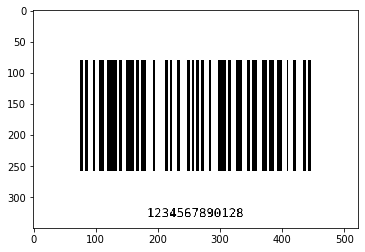

In [63]:
plt.imshow(k)

In [0]:
bar=pyzbar.decode(nimg)

In [65]:
bar[0].data.decode('utf8')

'1234567890128'

In [66]:
!pip install pyqrcode

In [0]:
import pyqrcode 
from pyqrcode import QRCode

In [0]:
url = pyqrcode.create("RamanClasses")

In [0]:
url.png("qr.png", scale = 8)

In [0]:
img3=cv2.imread("qr.png")
dec=pyzbar.decode(img3)

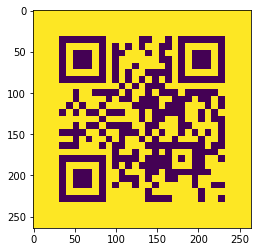

In [71]:
plt.imshow(plt.imread("qr.png"))

In [72]:
dec[0].data.decode('utf-8')

'RamanClasses'